<a href="https://colab.research.google.com/github/Cho-Min-Gyu/SW_PROJECT/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94_%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_%EC%A1%B0%EB%AF%BC%EA%B7%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Indian summer - Over the years

####데이터셋 설명
Indian summer - Over the years 데이터 셋은 2012년부터 2021년까지 인도의 인구가 가장 많은 상위 15개 도시들의 일일 온도, 이슬, 습도, 풍속 등을 포함하는 데이터 셋입니다.



##인도 기후의 특징 
* 인도 남부 = 열대성 기후 + 몬순 기후

* 인도 중부 = 열대와 아열대 + 몬순 기후가 혼재된 기후

* 인도 북부 = 고산기후 

In [88]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# RuntimeWarning 오류 해결 방법
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

plt.rc('font', family='NanumBarunGothic') 

In [6]:
# 데이터셋 읽기
df = pd.read_csv("/content/drive/MyDrive/데이터 시각화/Indian Summers - Over the years.csv")

In [7]:
df.head() # 데이터 확인을 위한 상단 부분 출력

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
0,New Delhi,2021-04-01,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.60,22.8,272.9,1002.8,0.0,3.1,2021-04-01 06:11:12,2021-04-01 18:39:13,0.60,Clear,Clear conditions throughout the day.
1,New Delhi,2021-04-02,33.9,16.0,25.8,31.8,16.0,24.9,4.5,27.62,12.4,275.0,1006.2,0.0,3.5,2021-04-02 06:10:04,2021-04-02 18:39:46,0.65,Clear,Clear conditions throughout the day.
2,New Delhi,2021-04-03,34.8,14.6,26.0,32.2,14.6,25.1,1.3,23.18,16.5,127.5,1008.8,1.4,3.5,2021-04-03 06:08:55,2021-04-03 18:40:19,0.70,Clear,Clear conditions throughout the day.
3,New Delhi,2021-04-04,36.8,16.9,27.1,34.2,16.9,26.0,4.8,28.00,18.3,157.6,1009.5,2.6,3.2,2021-04-04 06:07:47,2021-04-04 18:40:53,0.76,Clear,Clear conditions throughout the day.
4,New Delhi,2021-04-05,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,13.5,100.4,1007.8,38.4,3.1,2021-04-05 06:06:39,2021-04-05 18:41:26,0.81,Partially cloudy,Partly cloudy throughout the day.


### 데이터의 각 feature는 다음과 같은 의미를 가지고 있습니다.
* tempmax : 하루의 최고 기온 
* tempmin : 하루의 최저 기온 
* temp : 하루의 평균 기온
* feelslikemax : 가장 높은 체감 온도
* feelslikemin : 가장 낮게 느낀 체감 온도
* feelslike : 체감 온도의 평균
* dew : 이슬점
* humidity : 습도
* windspeed : 2분 동안의 평균 풍속
* winddir : 2분동안의 평균 풍향
* sealevelpressure : 해면기압
* cloudcover : 운량(구름의 양)
* visibility : 시정
* sunrise : 일출
* sunset : 일몰
* moonphase : 달의 위상변화
* condition : 대기 상태
* description : 대기 상태 설명



In [8]:
# 중복된 데이터가 있는지 확인
df.duplicated().all()

False

In [9]:
# data type과 결측치가 있는지 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              13650 non-null  object 
 1   Date              13650 non-null  object 
 2   tempmax           13615 non-null  float64
 3   tempmin           13615 non-null  float64
 4   temp              13605 non-null  float64
 5   feelslikemax      13614 non-null  float64
 6   feelslikemin      13614 non-null  float64
 7   feelslike         13604 non-null  float64
 8   dew               13605 non-null  float64
 9   humidity          13605 non-null  float64
 10  windspeed         13605 non-null  float64
 11  winddir           13600 non-null  float64
 12  sealevelpressure  10631 non-null  float64
 13  cloudcover        13605 non-null  float64
 14  visibility        13605 non-null  float64
 15  sunrise           13650 non-null  object 
 16  sunset            13650 non-null  object

In [10]:
# 각 column들이 몇 개의 null 값을 가졌는지 확인
df.isnull().sum()

City                   0
Date                   0
tempmax               35
tempmin               35
temp                  45
feelslikemax          36
feelslikemin          36
feelslike             46
dew                   45
humidity              45
windspeed             45
winddir               50
sealevelpressure    3019
cloudcover            45
visibility            45
sunrise                0
sunset                 0
moonphase              0
conditions            45
description           45
dtype: int64

In [11]:
# 데이터의 통계량 확인
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
count,13615.000000,13615.000000,13605.000000,13614.000000,13614.000000,13604.000000,13605.000000,13605.000000,13605.000000,13600.000000,10631.000000,13605.000000,13605.000000,13650.000000
mean,36.728248,25.821160,31.151510,40.212605,27.221324,33.704535,19.049607,54.638537,20.078552,205.236559,1004.302446,37.120235,4.666645,0.500692
std,4.115452,3.212167,3.074874,5.389016,4.907125,4.666616,5.966341,19.521510,9.886468,64.181345,4.183785,24.684504,1.382413,0.308204
min,0.000000,0.000000,19.900000,0.000000,0.000000,19.900000,-10.300000,7.410000,0.000000,0.000000,908.500000,0.000000,1.300000,0.000000
25%,34.000000,23.700000,29.200000,36.500000,23.700000,30.200000,15.000000,38.190000,14.800000,159.800000,1001.600000,16.700000,3.700000,0.250000
50%,37.000000,26.000000,31.100000,40.000000,26.000000,33.500000,20.300000,56.120000,19.500000,218.300000,1004.700000,36.700000,4.300000,0.500000
75%,39.800000,28.100000,33.200000,43.700000,31.100000,37.200000,24.000000,71.410000,24.100000,258.625000,1007.300000,54.000000,5.600000,0.760000
max,50.000000,37.000000,40.500000,79.200000,43.300000,48.500000,29.100000,99.040000,263.200000,360.000000,1026.200000,100.000000,12.300000,1.000000


# City column 내의 도시들 위치 시각화

In [12]:
df['City'].unique() # City 확인

array(['New Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Hyderabad',
       'Bengaluru', 'Pune', 'Ahmedabad', 'Surat', 'Jaipur', 'Bhopal',
       'Lucknow', 'Patna', 'Indore', 'Kanpur'], dtype=object)

In [13]:
#각 도시 별 마커 표시
import folium
folium.Map()

#folium.Map(location=[28.6, 77.2], zoom_start = 3.5)
india_map = folium.Map(location=[28.6, 77.2], zoom_start = 3.5)
 
df_cities = pd.DataFrame({'위도':[28.6, 19.07, 13.08, 22.56, 17.39, 12.97, 18.52, 23.02, 21.17, 26.91, 23.25, 26.87, 25.59, 22.72, 26.45], 
                          '경도':[77.2, 72.87, 80.27, 88.37, 78.5, 77.59, 73.85, 72.57, 72.82, 75.78, 77.40, 80.94, 85.12, 75.86, 80.32]}, 
    index=['New Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Hyderabad',
       'Bengaluru', 'Pune', 'Ahmedabad', 'Surat', 'Jaipur', 'Bhopal',
       'Lucknow', 'Patna', 'Indore', 'Kanpur'])
 
print(df_cities)
 
for i in range(len(df_cities)):
    folium.Marker([df_cities.iloc[i][0], df_cities.iloc[i][1]], popup=df_cities.index[i]).add_to(india_map)
    
india_map


              위도     경도
New Delhi  28.60  77.20
Mumbai     19.07  72.87
Chennai    13.08  80.27
Kolkata    22.56  88.37
Hyderabad  17.39  78.50
Bengaluru  12.97  77.59
Pune       18.52  73.85
Ahmedabad  23.02  72.57
Surat      21.17  72.82
Jaipur     26.91  75.78
Bhopal     23.25  77.40
Lucknow    26.87  80.94
Patna      25.59  85.12
Indore     22.72  75.86
Kanpur     26.45  80.32


# 시각화 결과
인도의 대도시는 주로 서쪽에 많이 분포되어있습니다.

# 가장 더웠던 연도 시각화

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

# Date column의 날짜 분리
df['month'] = pd.DatetimeIndex(df['Date']).month
df['week'] = pd.DatetimeIndex(df['Date']).week
df['year'] = pd.DatetimeIndex(df['Date']).year

In [15]:
year_tempmax = df.groupby('year')['tempmax'].agg('mean').sort_values(ascending=False).reset_index() # 해마다 tempmax 값들의 평균
#year_tempmax
year_feelslikemax = df.groupby('year')['feelslikemax'].agg('mean').sort_values(ascending=False).reset_index()


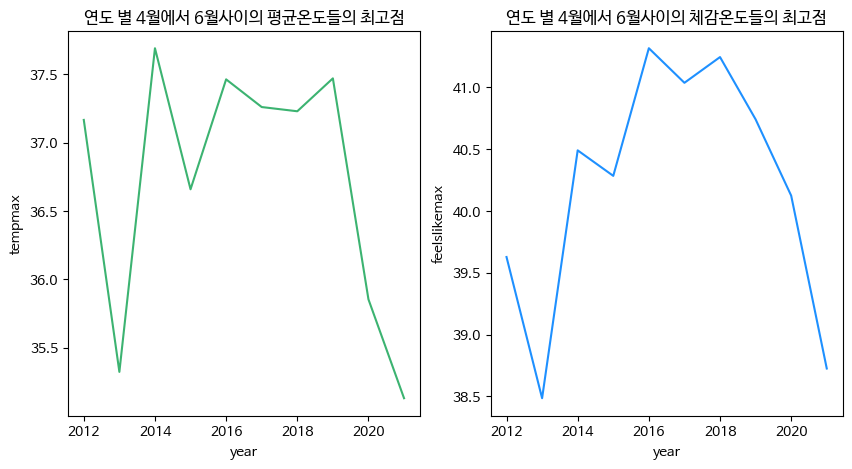

In [16]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title("연도 별 4월에서 6월사이의 평균온도들의 최고점")
sns.lineplot(data=year_tempmax, x='year', y='tempmax', color='#3CB371')
plt.grid(False)

plt.subplot(1, 2, 2)
plt.title('연도 별 4월에서 6월사이의 체감온도들의 최고점')
sns.lineplot(data=year_feelslikemax, x='year', y='feelslikemax', color='#1E90FF')
plt.grid(False)
#plt.show()

# 시각화 결과
* 2012년부터 2021년까지 최고 온도가 가장 높았던 연도는 2014년입니다.



# tempmax와 feelslikemax의 상관관계

In [17]:
# 두 데이터 프레임 병합
df_high = pd.merge(year_tempmax, year_feelslikemax)
#df_high

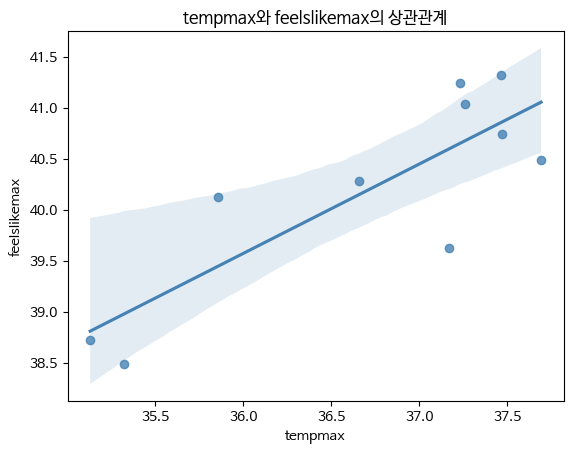

In [18]:
plt.title('tempmax와 feelslikemax의 상관관계')
sns.regplot(x='tempmax', y='feelslikemax', data=df_high, color = '#4682B4' )
plt.grid(False)

# 시각화 결과
* 회귀선을 살펴보면 우상향 하는 경향을 보이고 있는 것을 알 수 있습니다. 따라서 feelslikemax와 tempmax는 양의 인과관계가 있음을 확인할 수 있습니다.

In [19]:
df_high.corr() #df_high의 상관계수 

,year,tempmax,feelslikemax
year,1.000000,-0.275695,0.133258
tempmax,-0.275695,1.000000,0.834373
feelslikemax,0.133258,0.834373,1.000000


<Axes: >

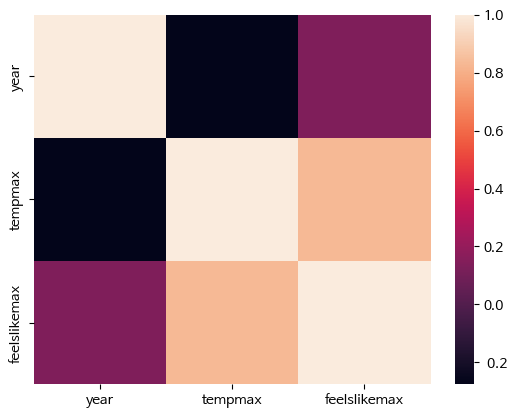

In [20]:
df_high_cor = df_high.corr()
sns.heatmap(df_high_cor)

# 시각화 결과
* 상관계수가 높을수록 두 변수 간의 상관성이 높습니다.
* 오른쪽의 color bar를 보면, 색이 옅은 색에 가까울 수록 상관성이 높다고 되어있으므로 tempmax와 feelslikemax 간의 양의 상관성이 높음을 알 수 있습니다.

# 2021년 4월 한달 동안 New Delhi의 대기 상태 시각화 

In [21]:
df['Date'] = df['Date'].astype(str)
df_a = df[df['City'].str.contains('New Delhi')]
df_april = df_a[df_a['Date'].str.contains('2021-04')]

In [22]:
df_april['conditions'].unique() # 전체 데이터 프레임에서 고유값 확인

array(['Clear', 'Partially cloudy', 'Rain, Partially cloudy'],
      dtype=object)

In [23]:
conditions_ratio = df_april["conditions"].value_counts(normalize=True)
conditions_ratio

Clear                     0.6
Partially cloudy          0.3
Rain, Partially cloudy    0.1
Name: conditions, dtype: float64

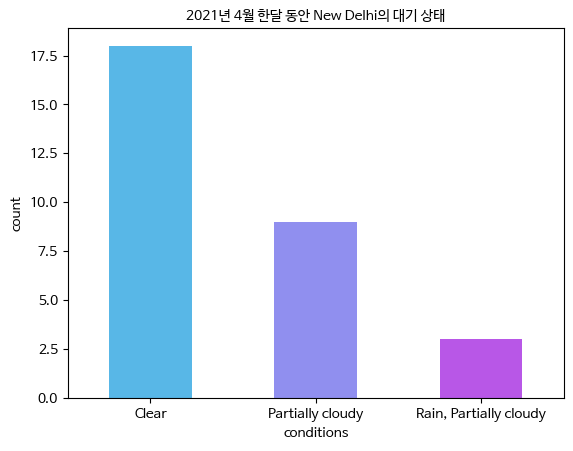

In [24]:
# New Delhi의 2021년 4월 한달 간에 대기 상태를 나타낸 막대 그래프
plt.title('2021년 4월 한달 동안 New Delhi의 대기 상태', fontsize=10)
sns.countplot(x='conditions', data=df_april, palette='cool', width=0.5)
plt.show()

# 시각화 결과
* 2021년 4월 한달 동안 절반이 넘는 날들이 날씨가 맑았음을 알 수 있습니다.
* 또한 비가 적게 왔음을 알 수 있습니다.

#2021년 4월 한달 간의 이슬점, 습도, 구름의 양, 풍속, 평균 온도의 상관관계

In [25]:
df_d = df_april[['humidity', 'dew', 'cloudcover', 'windspeed', 'temp']]
#df_d

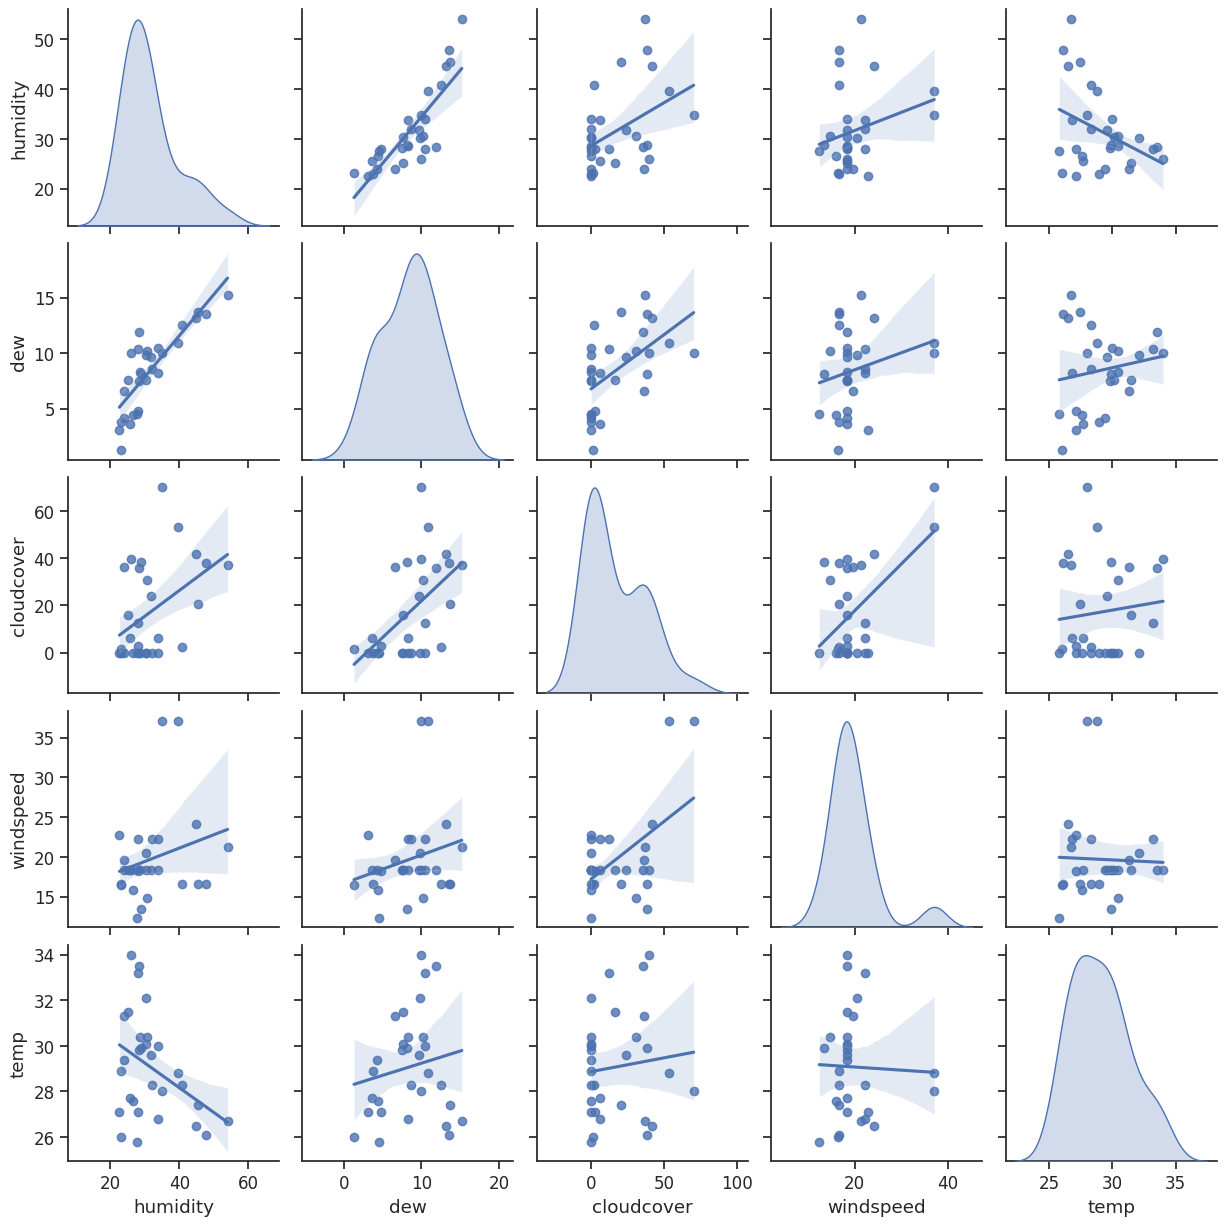

In [26]:
# 산점도 행렬 시각화
sns.set(font_scale=1.1) ## 폰트 크기 설정
sns.set_style('ticks') ## 축 눈금 설정
sns.pairplot(df_d,
             diag_kind='kde',# 상관계수가 1이면 분포로 표시
             kind='reg'# 회귀선 표시
            )
plt.show()

# 시각화 결과
* dew와 humidity는 회귀선의 기울기가 매우 크므로 높은 양의 상관관계를 가지고 있습니다.
* windspeed와 temp는 상관관계가 없습니다.
* temp와 humidity는 음의 상관관계를 가지고 있습니다.


# Review
- **Indian summer 데이터는**
 * 총 데이터 수: 13650
 * 총 결측치 수: 3617

- **가장 더웠던 연도는?**
 * 2014년이 가장 더웠다.

- **tempmax와 feelslikemax의 상관관계**
 * 회귀선을 살펴보면 우상향 하는 경향을 보이고 있는 것을 알 수 있고 feelslikemax와 tempmax는 양의 인과관계가 있음을 확인할 수 있다.

- **2021년 4월 한달 동안 New Delhi의 대기 상태 시각화**
 * 대체로 맑은 날의 많았고, 비가 오는 날은 거의 없었다.

- **2021년 4월 한달 간의 이슬점, 습도, 구름의 양, 풍속, 평균 온도의 상관관계**
  * windspeed와 temp는 상관관계가 없다.
  * temp와 humidity는 음의 상관관계를 가지고 있다.
  * dew와 humidity는 양의 상관관계를 가지고 있다.



